In [1]:
!pip install pyiceberg pandas duckdb --quiet

In [6]:
from pyiceberg.catalog.sql import SqlCatalog

In [7]:
catalog = SqlCatalog('default', uri='sqlite:///iceberg/pyiceberg_catalog.db')

In [8]:
table = catalog.load_table('default.hacker_news')

In [3]:
import duckdb

In [4]:
db = duckdb.connect()

In [9]:
table.scan().to_duckdb(table_name='hacker_news', connection=db)

In [10]:
db.sql('show tables')

┌─────────────┐
│    name     │
│   varchar   │
├─────────────┤
│ hacker_news │
└─────────────┘

In [11]:
import pandas as pd

In [14]:
db.sql('select * from hacker_news limit 10').df().head(5)

,title,url,text,dead,by,score,time,timestamp,type,id,parent,descendants,ranking,deleted
0,None,None,Could this be a replacement for git-annex?\nI&...,NaN,apex_sloth,NaN,1668589952,2022-11-16 09:12:32,comment,33620611,33612410.0,NaN,NaN,NaN
1,None,None,Wikipedia is definitely a good example of inte...,NaN,divan,NaN,1668589950,2022-11-16 09:12:30,comment,33620610,33613238.0,NaN,NaN,NaN
2,None,None,"&gt; HTML, XML, and ZIP files aren&#x27;t goin...",NaN,lqet,NaN,1668589936,2022-11-16 09:12:16,comment,33620609,33617161.0,NaN,NaN,NaN
3,None,None,It’s incredible and the more organisations doi...,NaN,randomsearch,NaN,1668589918,2022-11-16 09:11:58,comment,33620608,33620090.0,NaN,NaN,NaN
4,None,None,Hydrogen might be a solution to powering marin...,NaN,preisschild,NaN,1668589914,2022-11-16 09:11:54,comment,33620607,33618793.0,NaN,NaN,NaN


In [19]:
df = db.sql('select timestamp::date as date, count(*) as count from hacker_news group by 1 order by 1 limit 10').df()

In [22]:
df

,date,count
0,2022-10-28,8938
1,2022-10-29,9666
2,2022-10-30,11175
3,2022-10-31,14737
4,2022-11-01,14479
5,2022-11-02,15069
6,2022-11-03,15066
7,2022-11-04,16156
8,2022-11-05,11362
9,2022-11-06,11858


<Axes: xlabel='date'>

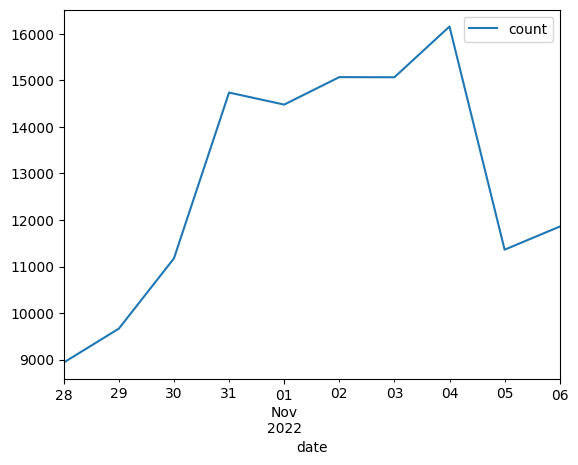

In [21]:
df.plot(x='date', y='count')

In [23]:
db.close()